## Final Project Submission

Please fill out:
* Student name:Mays Alkhwitar
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name:Claude Fried 
* Blog post URL:https://github.com/maysasaad/Phase_1_Project


# Highest Grossing Movies

![2222.png](images/2222.png)

# Overview

This project analyzes data needed by Microsoft to help them create a movie studio and produce movies that hit the box office. A descriptive analysis of some movies that have achieved high box office earnings The outcome data shows three recommendations. Microsoft can use this analysis to decide how to produce successful movies.

# Business Problem

Microsoft has decided to establish a movie studio and produce movies that hit the box office. The proposed solution is based on data from the most successful movies at the box office. A deep investigation has been done to reveal the most effective factors in the movie's revenues.

# The Data Source and Data Exploration

In this project, I work with a Dataset, which can be found in the folder zipped data and included data from the most popular websites for Movies rating :

Box Office Mojo (https://www.boxofficemojo.com/)

IMDB (https://www.imdb.com/)

Rotten Tomatoes (https://www.rottentomatoes.com/)

TheMovieDB (https://www.themoviedb.org/)

The Numbers (https://www.the-numbers.com/)

The dataset that I used included variables about :

1-Movie's Genre and an average of box office profits per genre.

2: The production budget and how it affects the movie's gross

3-The month in which the movie was released and how it impacted the box office revenues.

# Methods

This project uses descriptive , visual analysis, and statistical calculations.

This provides a useful overview of film industry trends, specifically the factors that contribute to increased box office revenues. We use some important libraries like SQLite3, Pandas, Numpy, and Matplotlib to analyze the data, which was collected from various locations, and the different files have different formats. Therefore, we need to load and clean each set of data and then join different sets of them together to get the results.

 

We will be able to:

1.Practice connecting to the database by using SQLite.

2.Practice using GROUP BY statements in SQL to apply aggregate functions like COUNT, MAX, MIN, and SUM.

3.Practice using the HAVING clause to compare different aggregates.

4.Opening and inspecting the contents of CSVs using pandas data frames

5.Practice identifying and handling missing values.

6.Practice joining multiple data frames.

7.Make visualizations using the Matplotlib and Seaborn libraries.

# Requirements

1. Load the Data with sqlite3
2. Load the Data from CSV and TVS files and read it as the pandas' data frame
3. Create data frames to represent the data.
4. Use pandas methods to inspect the shape and other attributes of these data frames.
5. Perform Data Cleaning (Identify and handle missing values)
6. Perform Data Aggregation and Join the data frames together. Identify and handle invalid values
7. Make visualizations using Matplotlip and Seaborn.


# The first question is: What is the average estimation of Box office profits based on Movies Genres?

# Connecting to the Database
In the cells below, we:

Import the necessary libraries, pandas,sqlite3 and numpy.



In [1]:
#Import the necessary libraries, pandas ,sqlite3 and numpy using the standard alias

import sqlite3 as sql
import pandas as pd 
import numpy as np


Establish a connection to the database data.SQLite called conn.

In [2]:
#connect to database
conn = sql.connect("zippedData/im.db/im.db")

Now, we connected to our database (zippedData)

In [3]:
#create a cursor.
cur = conn.cursor()

In [4]:
# (This is a special query for finding the table names. 
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

We displayed all the tables that are included in our database


### Data Understanding
here's the ERD diagram for this database:

![movie_data_erd.jpeg](movie_data_erd.jpeg)

According to the schema there is a relationship between movie_basics and movie rating ....let us view them.


### Load the Data

Use pd.read_sql to display the results of the query in a formatted table.

In [133]:
# Selecting All Data from the movie_basics table and group the data by geners (the types of the movies)
# view the top 5 rows of the dataframe use .head() method.

pd.read_sql(""" SELECT  *          
FROM movie_basics 
GROUP BY genres
;""",conn  )

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,None
1,tt0364201,Aman Ke Farishtey,Aman Ke Farishtey,2016,137.0,Action
2,tt6848590,Moonshine Meat Market Mayhem,Moonshine Meat Market Mayhem,2016,NaN,"Action,Adult,Comedy"
3,tt10097958,Gripped: Climbing Killer Pillar,Gripped: Climbing Killer Pillar,2019,NaN,"Action,Adventure"
4,tt0448694,Puss in Boots,Puss in Boots,2011,90.0,"Action,Adventure,Animation"
...,...,...,...,...,...,...
1081,tt5861250,The Wanderer,The Wanderer,2016,55.0,"Thriller,War,Western"
1082,tt1530983,Red Hill,Red Hill,2010,95.0,"Thriller,Western"
1083,tt10239930,Dog Company,Dog Company,2019,NaN,War
1084,tt5009172,"Dalibor, the Yugo Cowboy","Dalibor, the Yugo Cowboy",2014,138.0,"War,Western"


### Identifying and Handling Missing Values

We notice that the movie_basic dataframe has NaN values , let us remove these NaN values from our dataframe using WHERE clause

In [6]:
#S electing All Data from the movie_basic
# clean the data from Null values

pd.read_sql(""" SELECT  *          
FROM movie_basics 
WHERE genres IS NOT NULL AND original_title IS NOT NULL
GROUP BY genres
;""",conn )

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0364201,Aman Ke Farishtey,Aman Ke Farishtey,2016,137.0,Action
1,tt6848590,Moonshine Meat Market Mayhem,Moonshine Meat Market Mayhem,2016,NaN,"Action,Adult,Comedy"
2,tt10097958,Gripped: Climbing Killer Pillar,Gripped: Climbing Killer Pillar,2019,NaN,"Action,Adventure"
3,tt0448694,Puss in Boots,Puss in Boots,2011,90.0,"Action,Adventure,Animation"
4,tt1390411,In the Heart of the Sea,In the Heart of the Sea,2015,122.0,"Action,Adventure,Biography"
...,...,...,...,...,...,...
1080,tt5861250,The Wanderer,The Wanderer,2016,55.0,"Thriller,War,Western"
1081,tt1530983,Red Hill,Red Hill,2010,95.0,"Thriller,Western"
1082,tt10239930,Dog Company,Dog Company,2019,NaN,War
1083,tt5009172,"Dalibor, the Yugo Cowboy","Dalibor, the Yugo Cowboy",2014,138.0,"War,Western"


Now ,the movie_basic dataframe has no null values.

### Viewing the movie_rating data frame
Use pd.read_sql to display the results of the query in a formatted table

Write a query that gets the average rating.

In [7]:
# Selecting All Data from the movie_rating table and group the data by avarage rrating
pd.read_sql(""" SELECT  * 
FROM movie_ratings
GROUP BY averagerating ;""",conn)

,movie_id,averagerating,numvotes
0,tt7762194,1.0,67
1,tt7620554,1.1,598
2,tt7563496,1.2,86
3,tt8081062,1.3,3244
4,tt1736000,1.4,5
...,...,...,...
86,tt9680166,9.6,624
87,tt7541970,9.7,6
88,tt3450432,9.8,5
89,tt9743544,9.9,8


### Joining the movie_basics and movie_ratings together
Write a query that uses JOIN statements to get the genres and average rating. 

Refer to the ERD above to understand which tables contain these pieces of information, and the relationship between these tables.

Join movie_basics and movie_ratings tables based on shared key ("movie_id")

joining these two related tables based on the shared columns between them. group the new data frame by genres (movies type) filter the result by using the clause (having) to set a condition that displays the movies are having rate over 5 displayed the new data frame from the highest to lowest rate view only 300 rows by using limit.

In [8]:
# Join movie_basics and movie_ratings tables to create df data frame.
# group df data frame by genres using GROUP BY.
# filtering the data frame using (HAVING) to chose high rates movies
# display the data frame from highest to lowest movies rate using ORDER BY.

df = pd.read_sql(""" SELECT 
                b.original_title AS Title,
                b.start_year,
                b.genres AS genres ,
                r.averagerating AS rating ,
                r.numvotes
FROM movie_basics b 
JOIN movie_ratings r
USING ("movie_id")
GROUP BY genres
HAVING (averagerating BETWEEN 7 AND 10)
ORDER BY averagerating DESC
;""",conn) 
df

,Title,start_year,genres,rating,numvotes
0,Love on a Leash,2010,"Documentary,Family,Romance",9.7,25
1,Foosballers,2019,"Comedy,Documentary,Sport",9.7,22
2,Lost Conquest,2015,"Comedy,Documentary,Fantasy",9.4,5
3,Sunakali,2017,"Documentary,Family,Musical",9.3,19
4,The Long Count Teaser,2016,"History,Sport",9.2,5
...,...,...,...,...,...
308,Sunghursh,2013,"Action,Crime,Drama",7.0,77
309,Jackass 3D,2010,"Action,Comedy,Documentary",7.0,53289
310,Evangerion shin gekijôban: Kyu,2012,"Action,Animation,Drama",7.0,8215
311,1 Way Up: The Story of Peckham BMX,2014,"Action,Animation,Documentary",7.0,32


### Data frame summary

Getting a summary of the joined data frame by using.info() method

In [9]:
# summary of our data frame df using .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       313 non-null    object 
 1   start_year  313 non-null    int64  
 2   genres      313 non-null    object 
 3   rating      313 non-null    float64
 4   numvotes    313 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 12.4+ KB


The data types: The columns containing strings are type object. The columns containing whole numbers are type int64, whereas the columns containing decimal numbers are type float64.

### Perform Data Cleaning Required to Answer First Question

Recall that the first question is: What is the estimation of of Box office profits based on Movies Genres?

To answer this question, we will need to:

### Identifying and Handling Missing Values
checking if the data frame has missing data by using .isna() method

In [10]:
# checking if the data frame has missing data (na)
df.isna().sum()

Title         0
start_year    0
genres        0
rating        0
numvotes      0
dtype: int64

We notice that the df data frame has no missing values

When we checked the df data frame summary before, we noticed that the ("start_year") column has an integer data type. It should be DateTime.

Let us convert the data type by using pd.to_datetime.

In [11]:
#changing the data type of the(start_year) to datetime type

df['start_year'] = pd.to_datetime(df['start_year'])
df["start_year"]

0     1970-01-01 00:00:00.000002010
1     1970-01-01 00:00:00.000002019
2     1970-01-01 00:00:00.000002015
3     1970-01-01 00:00:00.000002017
4     1970-01-01 00:00:00.000002016
                   ...             
308   1970-01-01 00:00:00.000002013
309   1970-01-01 00:00:00.000002010
310   1970-01-01 00:00:00.000002012
311   1970-01-01 00:00:00.000002014
312   1970-01-01 00:00:00.000002015
Name: start_year, Length: 313, dtype: datetime64[ns]

We just got the correct data type for the (start_year) column.

### Identifying and Handling Text Data Requiring Cleaning

It's useful to be able to clean up minor issues in text data. Let us take a look at the values of the genres column in the DF data frame. We extract unique data from the dataset by using the.unique() function.

In [12]:
# Calculate the numbers of each Genre using .value_counts()
df["genres"].value_counts()


Adventure,Fantasy,Musical    1
Adventure,Biography,Crime    1
Comedy,Drama,Thriller        1
Documentary,Music,Sport      1
Drama,Musical                1
                            ..
Animation,Fantasy,Romance    1
Crime,Fantasy,Horror         1
Action,Crime,Documentary     1
Biography,Drama,Sport        1
Drama,Fantasy,Musical        1
Name: genres, Length: 313, dtype: int64

In [13]:
#Extract a unique data from the dataset by using .unique() function.
df["genres"].unique()

array(['Documentary,Family,Romance', 'Comedy,Documentary,Sport',
       'Comedy,Documentary,Fantasy', 'Documentary,Family,Musical',
       'History,Sport', 'Documentary,History,War',
       'Crime,Documentary,Drama', 'Action,Documentary,Sport',
       'Comedy,Documentary,Romance', 'War', 'Music,Mystery', 'Game-Show',
       'Documentary,Family,War', 'History,War',
       'Comedy,Documentary,Family', 'Adventure,Biography,Crime',
       'Drama,Short', 'Drama,Fantasy,War', 'Documentary,News,Sport',
       'Documentary,News,Reality-TV', 'Documentary,Drama,Thriller',
       'Comedy,Drama,Reality-TV', 'Comedy,Documentary,Mystery',
       'Biography,Drama,War', 'Adventure,Comedy,Documentary',
       'Drama,Fantasy,Musical', 'Documentary,Western',
       'Documentary,History,Western', 'Crime,Documentary,History',
       'Biography,Documentary,Musical', 'Biography,Documentary,Drama',
       'Adventure,Biography,Documentary', 'Action,Adventure,Musical',
       'Documentary,Music,War', 'Adventure

We notice that the.unique function returns the NumPy array of unique values in the genres column as a list.

 

Then we need to split this text data in the list above using the.str.split() method. Then we explode each element in each list into a row by using the explode() function. Using the.head () method, display the top 5 rows of a data frame.

In [14]:
# spliting the data in the columns (genres) using .str.split() method
# use the explode() function to explode each element in each string into a row:
# display the top 5 rows dataframe using .head() method

df["genres"] = df["genres"].str.split(",") 
genre_df = df.explode("genres") 
genre_df.head()

,Title,start_year,genres,rating,numvotes
0,Love on a Leash,1970-01-01 00:00:00.000002010,Documentary,9.7,25
0,Love on a Leash,1970-01-01 00:00:00.000002010,Family,9.7,25
0,Love on a Leash,1970-01-01 00:00:00.000002010,Romance,9.7,25
1,Foosballers,1970-01-01 00:00:00.000002019,Comedy,9.7,22
1,Foosballers,1970-01-01 00:00:00.000002019,Documentary,9.7,22


After this update let us calculate the numbers of each genre in genres column

In [15]:
# take a look at the counts of column (genres) in genre_df

genre_df["genres"].value_counts().sort_values()

Game-Show        1
Short            1
Reality-TV       4
Horror          17
News            17
Western         17
Sport           23
Sci-Fi          26
Musical         27
War             28
Thriller        32
Crime           32
Fantasy         33
Mystery         34
Romance         34
Family          34
Biography       37
Music           39
Animation       42
Adventure       45
History         46
Action          47
Comedy          57
Drama           79
Documentary    122
Name: genres, dtype: int64

We notice that the split function worked on each element of data

### Load the Data
load the data from (movie_info.tsv.gz) CSV file as a DataFrame and clean it as a first step

In [16]:
# Import data from  (movie_info.tsv.gz) file
# sep ="\t" to read tsv files as cvs
# view the top 5 rows from the data frame use .head()

df1 = pd.read_csv("zippedData/rt.movie_info.tsv.gz",sep ="\t")
df1.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


### Cleaning the dataframe

#### Reshape the data frame
Let us make our data frame more understandable, we use specific columns

In [17]:
# using spesifics colunms from df1
# view the top 5 rows from the data frame use .head()
df1 = pd.read_csv("zippedData/rt.movie_info.tsv.gz",sep ="\t",usecols=["genre","currency","box_office"])
df1.head()

,genre,currency,box_office
0,Action and Adventure|Classics|Drama,NaN,NaN
1,Drama|Science Fiction and Fantasy,$,"600,000"
2,Drama|Musical and Performing Arts,NaN,NaN
3,Drama|Mystery and Suspense,NaN,NaN
4,Drama|Romance,NaN,NaN


### Get a concise summary of the data using .info()

In [18]:
#summary of data frame df1 by using .info()method

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre       1552 non-null   object
 1   currency    340 non-null    object
 2   box_office  340 non-null    object
dtypes: object(3)
memory usage: 36.7+ KB


The data types seem to line up with: The columns containing strings are types object

### Perform Data Cleaning

It's useful to be able to clean up minor issues in text data. Examine the values of the genres column in the df1 data frame, and then use the.unique() function to extract a unique data point from the dataset.

In [19]:
# Calculate the numbers of each Genre using .value_counts()
df1["genre"].value_counts()

Drama                                                                                     151
Comedy                                                                                    110
Comedy|Drama                                                                               80
Drama|Mystery and Suspense                                                                 67
Art House and International|Drama                                                          62
                                                                                         ... 
Horror|Musical and Performing Arts|Science Fiction and Fantasy                              1
Horror|Kids and Family|Mystery and Suspense|Science Fiction and Fantasy                     1
Art House and International|Comedy|Kids and Family|Musical and Performing Arts|Romance      1
Classics|Drama|Mystery and Suspense|Science Fiction and Fantasy                             1
Action and Adventure|Art House and International|Drama|Faith

Let us take a look at the values of the genres column of the df1 data frame extract a unique data from the dataset by using .unique() function.

In [20]:
# Extract a unique data from the dataset by using .unique() function.
df1["genre"].unique()

array(['Action and Adventure|Classics|Drama',
       'Drama|Science Fiction and Fantasy',
       'Drama|Musical and Performing Arts', 'Drama|Mystery and Suspense',
       'Drama|Romance', 'Drama|Kids and Family', 'Comedy', 'Drama',
       'Action and Adventure|Mystery and Suspense|Science Fiction and Fantasy',
       nan, 'Documentary', 'Documentary|Special Interest',
       'Classics|Comedy|Drama', 'Comedy|Drama|Mystery and Suspense',
       'Action and Adventure|Comedy|Drama',
       'Action and Adventure|Drama|Science Fiction and Fantasy',
       'Art House and International|Comedy|Drama|Musical and Performing Arts',
       'Musical and Performing Arts',
       'Classics|Comedy|Musical and Performing Arts|Romance',
       'Action and Adventure|Drama|Mystery and Suspense',
       'Action and Adventure|Mystery and Suspense',
       'Art House and International|Classics|Horror|Mystery and Suspense',
       'Horror',
       'Action and Adventure|Classics|Drama|Mystery and Suspense',
   

We notice that the.unique function returns the NumPy array of unique values in the genres column as a list.

Then we need to split this text data in the list above using the.str.split() method. Then we explode each element in each list into a row by using the explode() function. 

In [21]:
# spliting the data in the columns (genre) using .str.split() method
# use the explode() function to explode each element in each string into a row
# display data frame 

df1["genre"] = df1["genre"].str.split("|") 
genre_df1 = df1.explode("genre") 
genre_df1


,genre,currency,box_office
0,Action and Adventure,NaN,NaN
0,Classics,NaN,NaN
0,Drama,NaN,NaN
1,Drama,$,"600,000"
1,Science Fiction and Fantasy,$,"600,000"
...,...,...,...
1559,Action and Adventure,NaN,NaN
1559,Art House and International,NaN,NaN
1559,Comedy,NaN,NaN
1559,Drama,NaN,NaN


 As we saw on the genre coloumn above there is an (and) word joins two genres on the same coloumn . lets remove it.

In [22]:
# Use function to replace and by ,
def convert_genre(value):
    """
     - Remove and
    """
    new_val = value.replace('and',',')
    return (new_val)

In [23]:
# Change genre column data type from object to string

genre_df1["genre"] = genre_df1["genre"].astype(str)

In [24]:
# using .apply() method to compute functions on the data contained in a column
genre_df1["genre"] =genre_df1 ["genre"].apply(convert_genre)
genre_df1

,genre,currency,box_office
0,"Action , Adventure",NaN,NaN
0,Classics,NaN,NaN
0,Drama,NaN,NaN
1,Drama,$,"600,000"
1,"Science Fiction , Fantasy",$,"600,000"
...,...,...,...
1559,"Action , Adventure",NaN,NaN
1559,"Art House , International",NaN,NaN
1559,Comedy,NaN,NaN
1559,Drama,NaN,NaN


We replaced (and) by (,)

Now tlet us split each string has more than 1 elements,Then explode each element in each string into a row

In [25]:
# spliting the data in the columns (genre) using .str.split() method
genre_df1["genre"] = genre_df1["genre"].str.split(",") 

In [26]:
# use the explode() function to explode each element in each string into a row:
genre_df1 = genre_df1 .explode("genre") 
genre_df1

,genre,currency,box_office
0,Action,NaN,NaN
0,Adventure,NaN,NaN
0,Classics,NaN,NaN
0,Drama,NaN,NaN
1,Drama,$,"600,000"
...,...,...,...
1559,International,NaN,NaN
1559,Comedy,NaN,NaN
1559,Drama,NaN,NaN
1559,Mystery,NaN,NaN


### Changing the column name
Let us make our data frame looks more understandable

In [27]:
# changing the column name by using .rename()

genre_df1.rename(columns = {'genre':'genres'}, inplace = True)
genre_df1

,genres,currency,box_office
0,Action,NaN,NaN
0,Adventure,NaN,NaN
0,Classics,NaN,NaN
0,Drama,NaN,NaN
1,Drama,$,"600,000"
...,...,...,...
1559,International,NaN,NaN
1559,Comedy,NaN,NaN
1559,Drama,NaN,NaN
1559,Mystery,NaN,NaN


### Get a concise summary of the data using .info()

In [28]:
# summary of data frame by using .info()method

genre_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4915 entries, 0 to 1559
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genres      4915 non-null   object
 1   currency    989 non-null    object
 2   box_office  989 non-null    object
dtypes: object(3)
memory usage: 153.6+ KB


From the summary we got above,the(box_office) column has a data type object and this column contains numerical values, so the data type should be changed to float by using a function and applying it to the data frame.

In [29]:
# Use function to convert object to float format
def convert_box_office(value):
    """
    Convert the string number value to a float
     
     - Remove commas
     - Convert to float type
    """
    new_val = value.replace(',','')
    return float(new_val)

In [30]:
# Change box_office column data type from object to string

genre_df1["box_office"] = genre_df1["box_office"].astype(str)

In [31]:
# Apply the function to the (production_budget) series

genre_df1["box_office"] = genre_df1["box_office"].apply(convert_box_office)

### Get a concise summary of the data using .info()

In [32]:
# Summary of genre_df1 by using .info() method
genre_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4915 entries, 0 to 1559
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genres      4915 non-null   object 
 1   currency    989 non-null    object 
 2   box_office  989 non-null    float64
dtypes: float64(1), object(2)
memory usage: 153.6+ KB


The data types seem to line up with what we expect. The column containing strings is a type object The columns containing floats are type float64.

### Identifying and Handling Missing Values
Use .isna() to identyfy if there are missing values in the data frame

In [33]:
# checking is thier any missing values
genre_df1.isna().sum()

genres           0
currency      3926
box_office    3926
dtype: int64

We have a lot of missing values. We have to handle it either by removing non-important columns for our analyzing purposes or by dropna() or, for non-numeric columns, fill the missing values with the median value of the same column that has missing numerical values.

In [34]:
# calculate the median value for the box_office colunm
med = genre_df1 ["box_office"].median()
med

15687400.0

In [35]:
#filling the missing values with median by using .fillna() method
genre_df1["box_office"] = genre_df1['box_office'].fillna( genre_df1 ["box_office"].median())

In [36]:
# calculate mode value for the currency colunm
mode = genre_df1["currency"].mode()
mode

0    $
dtype: object

In [37]:
# filling the missing values with mode by using .fillna() method

genre_df1["currency"] = genre_df1["currency"].fillna("$")


In [38]:
# checking is thier any missing values
genre_df1.isna().sum()

genres        0
currency      0
box_office    0
dtype: int64

In [39]:
# display the data frame
genre_df1

,genres,currency,box_office
0,Action,$,15687400.0
0,Adventure,$,15687400.0
0,Classics,$,15687400.0
0,Drama,$,15687400.0
1,Drama,$,600000.0
...,...,...,...
1559,International,$,15687400.0
1559,Comedy,$,15687400.0
1559,Drama,$,15687400.0
1559,Mystery,$,15687400.0


### Joining the Data frames Together
Joining the Dataframes Together First, identify the shared key between genre_df and genre_df1. (Shared key meaning, the values we want to join on). The shared key between these two dataframes is (genres) column. We will use merge() method

In [40]:
# Create new data frame by combining genre_df and genre_df1
# View the  data frame.
box_office = pd.merge(genre_df,genre_df1,on ="genres",how = "left")
box_office

,Title,start_year,genres,rating,numvotes,currency,box_office
0,Love on a Leash,1970-01-01 00:00:00.000002010,Documentary,9.7,25,$,15687400.0
1,Love on a Leash,1970-01-01 00:00:00.000002010,Documentary,9.7,25,$,15687400.0
2,Love on a Leash,1970-01-01 00:00:00.000002010,Documentary,9.7,25,$,15687400.0
3,Love on a Leash,1970-01-01 00:00:00.000002010,Documentary,9.7,25,$,15687400.0
4,Love on a Leash,1970-01-01 00:00:00.000002010,Documentary,9.7,25,$,15687400.0
...,...,...,...,...,...,...,...
124117,1 Way Up: The Story of Peckham BMX,1970-01-01 00:00:00.000002014,Documentary,7.0,32,$,15687400.0
124118,1 Way Up: The Story of Peckham BMX,1970-01-01 00:00:00.000002014,Documentary,7.0,32,$,2927972.0
124119,Jurassic World,1970-01-01 00:00:00.000002015,Action,7.0,539338,NaN,NaN
124120,Jurassic World,1970-01-01 00:00:00.000002015,Adventure,7.0,539338,NaN,NaN


The merge between the genre_df and genre_df1 is Left Join returns all the records from the left table, as well as the shared records from the right table .

### Get a concise summary of the data using .info()

In [41]:
# Summary of box_office by using .info() method
box_office.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124122 entries, 0 to 124121
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Title       124122 non-null  object        
 1   start_year  124122 non-null  datetime64[ns]
 2   genres      124122 non-null  object        
 3   rating      124122 non-null  float64       
 4   numvotes    124122 non-null  int64         
 5   currency    123616 non-null  object        
 6   box_office  123616 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 7.6+ MB


The data types seem to line up with what we expect. The column containing strings is a type object. The columns containing floats are type float64. The column containing a date is type datetime64. The column containing integers is type int64 .

### Identifying and Handling Missing Values

In [42]:
# checking if there is any missing value in the data frame
box_office.isna().sum()

Title           0
start_year      0
genres          0
rating          0
numvotes        0
currency      506
box_office    506
dtype: int64

We got a lot of missing values, we have to handle it either by removing nonimportant columns for our analyzing by. dropna() or fill the missing values by the median value of the same column which has missing numerical values and fill the missing values by the mode value for non-numeric columns.

In [43]:
# calculate mode value for the currency colunm
mod = box_office["currency"].mode()
mod

0    $
dtype: object

In [44]:
# filling the missing values with mode by using .fillna() method
box_office["currency"] = box_office["currency"].fillna("$")


In [45]:
# calculate the median value for the box_office colunm

medi = box_office ["box_office"].median()
medi

15687400.0

In [46]:
# filling the missing values with median by using .fillna() method
box_office["box_office"] = box_office["box_office"].fillna(medi)


In [47]:
# checking for missing value with .dropna()method.
box_office.isna().sum()


Title         0
start_year    0
genres        0
rating        0
numvotes      0
currency      0
box_office    0
dtype: int64

The box_office dataframe is clean from NaN values now.

In [48]:
# take a look at the counts of column (genres) in box office dataframe
box_office["genres"].value_counts().sort_values()

Game-Show          1
Short              1
Reality-TV         4
News              17
Sport             23
Sci-Fi            26
Musical           27
War               28
Thriller          32
Crime             32
Fantasy           33
Family            34
Mystery           34
Biography         37
Music             39
Adventure         45
History           46
Action            47
Western          816
Animation       1974
Horror          2278
Romance         6732
Documentary     8418
Comedy         31350
Drama          72048
Name: genres, dtype: int64

In [49]:
# create a new data frame grouped by the (genres) colunm and calculate its mean
box_office_genre = box_office.groupby("genres").mean()
box_office_genre

,rating,numvotes,box_office
genres,,,
Action,7.634043,55112.914894,1.568740e+07
Adventure,7.813333,108411.155556,1.568740e+07
Animation,7.540476,6475.976190,3.206179e+07
Biography,7.832432,8273.513514,1.568740e+07
Comedy,7.875439,18611.192982,2.212409e+07
Crime,7.646875,11950.875000,1.568740e+07
Documentary,7.892623,2006.385246,1.485459e+07
Drama,7.622785,54621.278481,1.844318e+07
Family,7.794118,29884.852941,1.568740e+07


The above data frame, which we called box_office_genre, shows us the box office profit value of each type of movie.

In [50]:
# display the data frame sorted by the box office column from highest to lowest profits
box_office_genre = box_office_genre.sort_values(by = "box_office",ascending = [False])
box_office_genre

,rating,numvotes,box_office
genres,,,
Animation,7.540476,6475.976190,3.206179e+07
Romance,7.694118,7269.529412,2.259814e+07
Comedy,7.875439,18611.192982,2.212409e+07
Drama,7.622785,54621.278481,1.844318e+07
Horror,7.470588,95.176471,1.784302e+07
Musical,7.848148,26933.666667,1.568740e+07
War,7.939286,4678.678571,1.568740e+07
Thriller,7.715625,33148.718750,1.568740e+07
Sport,7.865217,5404.434783,1.568740e+07


We found that Animation genre gains highest profits ,on the other hand ,Documentary genre gets the lowest profits.

### Get a concise summary of the data using .info()

In [51]:
# Summary after applied changes to the data frame
box_office_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Animation to Documentary
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      25 non-null     float64
 1   numvotes    25 non-null     float64
 2   box_office  25 non-null     float64
dtypes: float64(3)
memory usage: 800.0+ bytes


We got 25 different movies and the avarage amount of their profits on the box office. Let us display the top 5 movies that gained high profits on the box office.

In [52]:
# Display rows 0 through 5
top5_genre = box_office_genre.iloc[0:5]
top5_genre

,rating,numvotes,box_office
genres,,,
Animation,7.540476,6475.976190,3.206179e+07
Romance,7.694118,7269.529412,2.259814e+07
Comedy,7.875439,18611.192982,2.212409e+07
Drama,7.622785,54621.278481,1.844318e+07
Horror,7.470588,95.176471,1.784302e+07


### Data visualization

A quick introduction to Matplotlib and seaborn libraries. 

Matpalotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
Most of the Matplotlib utilities lies under the pyplot submodule usually imported under the plt alias.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.

### Plotting with categorical data
In seaborn, there are several different ways to visualize a relationship involving categorical data.We would use Bar plot.

### Bar plots

In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category.(https://seaborn.pydata.org/tutorial/categorical.html)

In [53]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
# dataframe which we want to visualize.
data = top5_genre

([<matplotlib.axis.YTick at 0x1d874d6c880>,
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

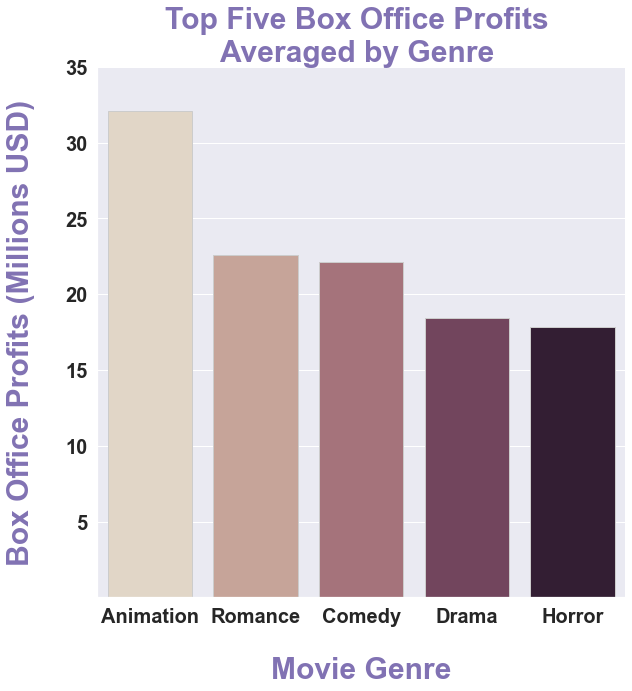

In [55]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# create a Categorical Plot (bar) kind.
sns.catplot(x = top5_genre.index, 
                y = top5_genre['box_office']/1000000, 
                data= top5_genre ,
                kind='bar',
                height =8,
                palette="ch:.25",
                edgecolor=".8"); 



# Set title with matplotlib
plt.title('Top Five Box Office Profits \nAveraged by Genre ',color='m',fontweight='bold',fontsize=30)
# Add x-axis label
plt.xlabel("Movie Genre",color='m',labelpad=30,fontweight='bold',fontsize=30)
# Add y-axis label
plt.ylabel("Box Office Profits (Millions USD)",color='m',labelpad=30,fontweight='bold',fontsize=30)
# customize labelsi
plt.xticks(fontweight='bold',fontsize=20)
plt.yticks([5,10,15,20,25,30,35],fontweight='bold',fontsize=20)


Based on the information we got from joining the movie_basic table and movie_rating and the boxoffice data frame the highest number of produced movies is Drama movies, However; the highest boox office profits we got on the Animation genre.

# The second question is: what is the relationship between the movie's gross and the movie's production budget?

In order to answer this question, we will load the data from csv files as DataFrames and clean it as a first step,second step. Then we will join these to Data Frames.

### Load the Data
Load the Data from ("zippedData/bom.movie_gross.csv.gz") file as a DataFrame in pandas.

In [56]:
# Importing data from csv file 
# Reset the index of the dataframe
# Display the first 5 rows of df by using .head() method

df2 = pd.read_csv("zippedData/bom.movie_gross.csv.gz",index_col=0)
df2.reset_index(inplace=True)
df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


We've now loaded the data from a file into a DataFrame with new index.

### Get a concise summary of the data using .info()

In [57]:
#getting summary about the dataframe by using .info method
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The data types : The columns containing strings are type object, The columns containing whole number are type int64 whereas, The columns containing decimal numbers are type float64.

### Perform Data Cleaning
From the summary we got above , we noticed that we need to clean the dataframe by changing some column data types,identifying and handeling missing data if there is any, and may be reshaping the data frame to make it more understandable.

### Changing datatype
The column year has a data type int64 and this column contains dates ,so the data type should be changed to date time . method to_datetime ()

In [58]:
# Use pandas.to_datetime() to convert string to datetime format

df2["year"] = pd.to_datetime(df2["year"])
df2["year"]

0      1970-01-01 00:00:00.000002010
1      1970-01-01 00:00:00.000002010
2      1970-01-01 00:00:00.000002010
3      1970-01-01 00:00:00.000002010
4      1970-01-01 00:00:00.000002010
                    ...             
3382   1970-01-01 00:00:00.000002018
3383   1970-01-01 00:00:00.000002018
3384   1970-01-01 00:00:00.000002018
3385   1970-01-01 00:00:00.000002018
3386   1970-01-01 00:00:00.000002018
Name: year, Length: 3387, dtype: datetime64[ns]

### Identifying and Handling Missing Values
Using the.isna() method to see if the data frame has any missing data.

Fill in missing values (either using another value from the column, like median)

Drop rows with missing values.

In [59]:
#checking for missing values

df2.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Notice that we have a lot of missing values on both domestic_gross and foreign_gross columns, so we need to fill all these missing values by median values for both columns. First, we'll use the.to_numeric() method to convert the (foreign_gross) data type from object to float.

In [60]:
#convert the type of foreign_gross colunm from object to float

df2['foreign_gross'] = pd.to_numeric(df2['foreign_gross'],errors = 'coerce')
df2['foreign_gross'].astype(float)

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3387, dtype: float64

In [61]:
# Calculate the median value for foreign_gross column
med =df2["foreign_gross"].median()
med

18900000.0

In [62]:
# Replace all missing values in the (foreign_gross) column with the median of the column#

df2["foreign_gross"] = df2['foreign_gross'].fillna(df2['foreign_gross'].median())

In [63]:
# colunm by the median value for (domestic_gross) column.
med1 = df2["domestic_gross"].median()
med1

1400000.0

I chose the median as the relevant measure. When a variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

In [64]:
# Replace all missing values in the 'foreign_gross' column with the median of the column#
df2["domestic_gross"] = df2['domestic_gross'].fillna(df2['domestic_gross'].median())

In [65]:
# drop other missing value with .dropna()method.
df2=df2.dropna()

In [66]:
# checking is thier any missing values
df2.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Now our df2 data frame has no missing values

### Reshape the dataframe
Change the column name from year to release_date. Reset the index and display the top 5 rows after applying the change by using the.head method.

In [67]:
# Change the column name by using .rename() method 

df2.rename(columns = {'year':'release_date'}, inplace = True)

In [68]:
# display the index
df2.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386],
           dtype='int64', length=3382)

In [69]:
# Reset the index and display the top 5 rows after applied the change by using .head()method

df2=df2.reset_index(drop=True)

df2.head()

,title,studio,domestic_gross,foreign_gross,release_date
0,Toy Story 3,BV,415000000.0,652000000.0,1970-01-01 00:00:00.000002010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,1970-01-01 00:00:00.000002010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,1970-01-01 00:00:00.000002010
3,Inception,WB,292600000.0,535700000.0,1970-01-01 00:00:00.000002010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,1970-01-01 00:00:00.000002010


### Getting summary about the dataframe by using .info method

In [70]:
# Getting summary about the data frame by using .info method
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3382 entries, 0 to 3381
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3382 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3382 non-null   float64       
 3   foreign_gross   3382 non-null   float64       
 4   release_date    3382 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 132.2+ KB


The data types seem to line up with what we expect. The column containing strings is a type of object. The columns containing floats are of type float64. The column containing the date is of type datetime64.

### Load the Data
Load the Data from ("zippedData/tn.movie_budgets.csv.gz") file as DataFrame in Pandas.

In [71]:
# Importing data from the file (tn.movie_budgets.csv.gz)
# view the first 5 rows by using .head() method.

df3 = pd.read_csv("zippedData/tn.movie_budgets.csv.gz",index_col=0)
df3.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Getting Summary of the dataframe by using .info()method

In [72]:
# Summary of the data frame by using .info()method

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


The data types seem to line up with what we expect. The columns containing strings are type object

### Perform Data Cleaning
Changing some data types

Identifying and Handling Missing Values

Reshape the data frame.

### Changing some datatypes
We can see from the summary that the column (release_date) has a data type object and contains dates, so the data type should be changed to date time using the.to_datetime() method.

In [73]:
# Use pandas.to_datetime() to convert string to datetime format
df3["release_date"] = pd.to_datetime(df3["release_date"])
df3["release_date"]

id
1    2009-12-18
2    2011-05-20
3    2019-06-07
4    2015-05-01
5    2017-12-15
        ...    
78   2018-12-31
79   1999-04-02
80   2005-07-13
81   2015-09-29
82   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

We also can notice from the summary above that the (production_budget,domestic_gross,worldwide_gross),columns appear with the object data type, it also contains the $ sign and comma.So we need to clean the data in them. We will create a function to clean unwanted signs and convert the data type to float.Then apply this function to the columns using the .apply () method

In [74]:
# Use function to convert object to float format
def convert_protection(value):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = value.replace(',','').replace('$', '')
    return float(new_val)

In [75]:
# Apply the function to the (production_budget) series

df3["production_budget"] = df3["production_budget"].apply(convert_protection)


In [76]:
# Apply the function to the (domestic_gross) series

df3["domestic_gross"] = df3["domestic_gross"].apply(convert_protection)

In [77]:
# Apply the function to the (worldwide_gross) series

df3["worldwide_gross"] = df3["worldwide_gross"].apply(convert_protection)

The.apply () method takes a function as an input and applies this function to a single column in a DataFrame.

### Get a concise summary of the data using .info()

In [78]:
# Summary after applied changes to the data frame

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   domestic_gross     5782 non-null   float64       
 4   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 271.0+ KB


The data types seem to line up with what we expect. The column containing strings is a type object.The columns containing floats are type float64. The column containing the date is type datetime64

### Identifying and handling Missing Values

In [79]:
#check for missing data
df3.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

We can notice that df3 is clean now ,there is no missing values

### Reshape the data frame
Let us make our data frame more understandable , we will change some colunms names using .rename() method

In [80]:
#change the column name
df3.rename(columns = {'worldwide_gross':'foreign_gross'}, inplace = True)

In [81]:
#change thw column name
df3.rename(columns = {'movie':'title'}, inplace = True)

In [82]:
#display the top 5 rows after changing by using .head() methods
df3.head()

,release_date,title,production_budget,domestic_gross,foreign_gross
id,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


Now our df2 and df3 are both clean and ready to join to gether in order to answer our question.

### Joining the Dataframes Together

Joins are always executed between a Left Table (df3) and a Right Table (df2).Using merge()
A Left Join returns all the records from the left table, as well as any records from the right table that have a matching key with a record from the left table

In [83]:
# Create a new data frame by  combinngdf3and df2 by using .merge() method 
# view thetop 5 rows of dataframe by using .head() method
budget_df = pd.merge(df3,df2,how ="left")
budget_df.head()

,release_date,title,production_budget,domestic_gross,foreign_gross,studio
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,NaN
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,NaN
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,NaN
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN


### Get a concise summary of the data using .info()


In [84]:
# summary of the joined dataframe 

budget_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   title              5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   domestic_gross     5782 non-null   float64       
 4   foreign_gross      5782 non-null   float64       
 5   studio             0 non-null      object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 316.2+ KB


The data types seem to line up with what we expect. The column containing strings is type object . The columns containing floats are type float64. The column containing date is type datetime64

### Perform Data Cleaning Required to Answer Second Question

Recall that the second question is: What is the relationship between the Movie's gross and production budget?

To answer this question, we will need to:

### Identifying and Handling Missing Values
Use .isna() method to check for missing values in budget_df. Use .drop() to remove the missing values

In [85]:
#checking for missing values

budget_df.isna().sum()

release_date            0
title                   0
production_budget       0
domestic_gross          0
foreign_gross           0
studio               5782
dtype: int64

We can noticetha studio colunm has a huge number of missing data ,we can remove them by using .drop()method

In [86]:
#drop studio column

budget_df = budget_df.drop("studio",axis = 1)

In [87]:
# Display the 5 top rows from the joined dataframe after cleaning it

budget_df.head()

,release_date,title,production_budget,domestic_gross,foreign_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


### Analizing Data
When we review the budget_df, we notice that we need to calculate the total gross of each movie in order to compare it with the production budget and determine whether the movie makes profits. Let us create a new column called (total gross) containing the sum of the (domestic gross and foreign gross)columns.

In [88]:
# Creating a new colunm called (total_gross) containing the sumation of (domestic_gross) and (foreign_gross) columns
# Display thetop 5 rows of the DataFrame

budget_df["total_gross"]=budget_df["domestic_gross"]+budget_df["foreign_gross"]
budget_df.head()

,release_date,title,production_budget,domestic_gross,foreign_gross,total_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09


### Analize the relationship between the production_budget and total_gross
We assume that we can gain more from a movie has a big production budget. Let us measures of central tendency and dispersion

In [89]:
# display the dataframe sorted by the production budget from high to low cost

budget_df.sort_values(by = "production_budget",ascending = [False]).head()

,release_date,title,production_budget,domestic_gross,foreign_gross,total_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09


Notice that the budget_df ordred by the production_budget values from highest to lowest.

### calculate some basic statistical of the data frame
Let us use .describe() method to calculate some basic statistical of the data frame or a series of numeric values.

In [90]:
# calculate some basic statistical 
budget_df.describe()

,production_budget,domestic_gross,foreign_gross,total_gross
count,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07,1.333608e+08
std,4.181208e+07,6.824060e+07,1.747200e+08,2.399411e+08
min,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06,6.448924e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07,4.605855e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07,1.506937e+08
max,4.250000e+08,9.366622e+08,2.776345e+09,3.536853e+09


Let us explain the most important measure in this case:

Std:Standard deviation refers to how widely distributed the values are,we can notice that the movie with the highest production budget can get the highest Movie's gross.

### Data visualization
Let's also plot our data to clarify the relationship between production budget and total gross. To use statistical models to estimate a simple relationship between two noisy sets of observations.We will use Scatter plot from seaborn library.

### Scatter plot

A scatter plot uses dots to represent values for two different numeric variables.one plotted along the x-axis and the other plotted along the y-axis. Scatter plots are used to observe relationships between variables.

### Scatter plot in Seaborn library
The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters.
These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective.
(https://seaborn.pydata.org)

([<matplotlib.axis.YTick at 0x1d871cfbc40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

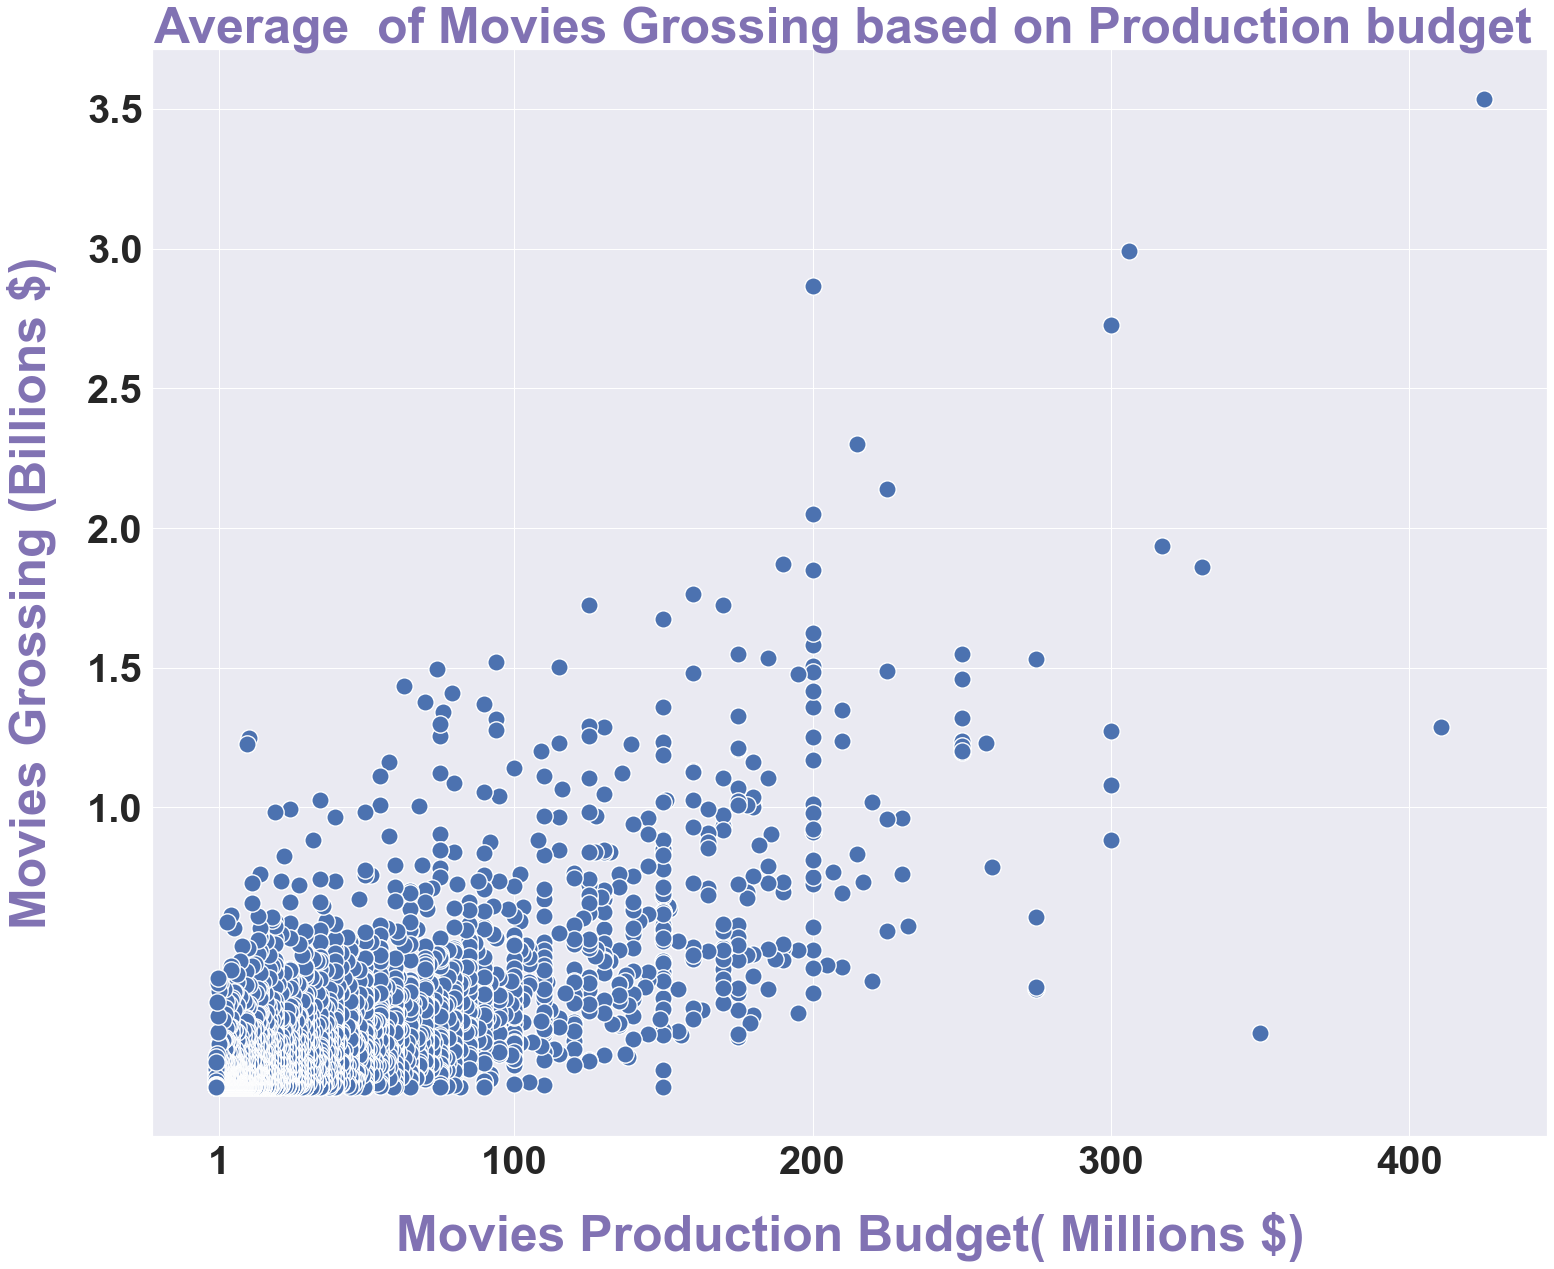

In [91]:
# creating the figure and setting the figure size

fig,ax = plt.subplots(figsize=(25,20))
# set plot style: grey grid in the background
sns.set(style='darkgrid')
# Passing data and assigning x and y will draw a scatter plot between two variables.
# Pass the name of palette or explicit colors 
# passing the marker size.
sns.scatterplot(data = budget_df.describe() ,
                x = budget_df["production_budget"]/1000000,
                y = budget_df["total_gross"]/1000000000,
                palette="Set2",
                s=300
                
                );
# Set title with matplotlib
plt.title('Average  of Movies Grossing based on Production budget ',color='m',fontweight='bold',fontsize=50)
# Add x-axis label
plt.xlabel("Movies Production Budget( Millions $)",color='m',labelpad=30,fontweight='bold',fontsize=50)
# Add y-axis label
plt.ylabel("Movies Grossing (Billions $)",color='m',labelpad=30,fontweight='bold',fontsize=50) 
# customize labels
plt.xticks([1,100,200,300,400],fontweight='bold',fontsize=40)
plt.yticks([1,1.5,2,2.5,3,3.5],fontweight='bold',fontsize=40)

Notice that , in general, as production budget increases, total gross increases as well which means the data points have a positive corelationship.


# The third question is: What is the distribution of Box office profits depending on the month that the movie releases on?



In order to answer this question, we will load the data from CSV files as a DataFrame and clean it as a first step. In a second step, we will join these to Data Frames.

In [92]:
# loading data from (tmdb.movies.csv.gz) file
# View the top 5 rows of the DataFrame
df4=pd.read_csv("zippedData/tmdb.movies.csv.gz")
df4.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [93]:
# Using spesific columns from the dataframe4 
# View the top 5 rows of the DataFrame
df4=pd.read_csv("zippedData/tmdb.movies.csv.gz",usecols=["title","release_date","vote_average","vote_count","popularity"])
df4.head()

,popularity,release_date,title,vote_average,vote_count
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,28.005,1995-11-22,Toy Story,7.9,10174
4,27.920,2010-07-16,Inception,8.3,22186


### Get a concise summary of the data using .info()

In [94]:
#summary about df4 by using .info()methods

df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    26517 non-null  float64
 1   release_date  26517 non-null  object 
 2   title         26517 non-null  object 
 3   vote_average  26517 non-null  float64
 4   vote_count    26517 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.0+ MB


The data types line up : The column containing strings is type object . The columns containing floats are type float64. The column containing intger is type int64

### Perform Data Cleaning
Let us clean the df4. Based on what we found in the above summary , It would be good to change some data types, identifying and handling missing values, Reshape the data frame.

### Change some data types
We notice that the (release_date) column should represent the date but it appears as an object. It should be in a datetime format. use.to_datetime()


In [95]:
# Use pandas.to_datetime() to convert Object to datetime format
df4["release_date"] = pd.to_datetime(df4["release_date"])
df4["release_date"].sort_values()

14335   1930-04-29
21758   1933-01-21
3580    1936-02-27
26345   1939-01-19
11192   1946-12-25
           ...    
24819   2019-05-17
24003   2019-05-17
24892   2019-06-28
24265   2019-06-28
26057   2020-12-25
Name: release_date, Length: 26517, dtype: datetime64[ns]

The (release_date) column data type appears as datetime

The data types seem to line up with what we expect. The column containing strings is type object The columns containing floats are type float64 ,The column containing intger is type int64 he column containing date is type datetime64

### Cleaning the dataframe
Identifying and Handling Missing Values by using .isna()

In [96]:
#checking for missing values
df4.isna().sum()

popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
dtype: int64

There is no missing value

### Load the Data

load the data from (movie_info.tsv.gz) csv file as a DataFrame and clean it as a first step

In [97]:
# Import data from  (movie_info.tsv.gz) file
#sep ="\t" to read tsv files as cvs
# using spesifics colunms from df5
# view the top 5 rows from the data frame use .head()
df5 = pd.read_csv("zippedData/rt.movie_info.tsv.gz",sep ="\t",usecols=["theater_date","currency","box_office"])
df5.head()

,theater_date,currency,box_office
0,"Oct 9, 1971",NaN,NaN
1,"Aug 17, 2012",$,"600,000"
2,"Sep 13, 1996",NaN,NaN
3,"Dec 9, 1994",NaN,NaN
4,NaN,NaN,NaN


In [98]:
#summary of dataframe5 by using .info()method

df5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   theater_date  1201 non-null   object
 1   currency      340 non-null    object
 2   box_office    340 non-null    object
dtypes: object(3)
memory usage: 36.7+ KB


The data types seem to line up with what we expect. The column containing strings is type object.

### Changing some data types
According to the summary, the column (theater_date) has a data type of object and contains dates, so the data type should be changed to datetime using the.to_datetime () method.

In [99]:
# Use pandas.to_datetime() to convert string to datetime format
df5["theater_date"] = pd.to_datetime(df5["theater_date"])
df5["theater_date"].sort_values()

857    1921-01-01
157    1922-03-04
550    1926-03-08
1140   1929-09-18
1490   1929-10-01
          ...    
1543          NaT
1547          NaT
1548          NaT
1549          NaT
1551          NaT
Name: theater_date, Length: 1560, dtype: datetime64[ns]

From the summary we got above ,we notice that the column (box_office) has a data type object and this column contains numerical values ,so the data type should be changed to float by using a function and applying it to the data frame.

In [100]:
# change the data type of  (production_budget) series to string

df5["box_office"] = df5["box_office"].astype(str)

In [101]:
# Apply the function to the (production_budget) series

df5["box_office"] = df5["box_office"].apply(convert_box_office)

### Get a concise summary of the data using .info()

In [102]:
# Sumarry of df5 by using .info() method
df5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   theater_date  1201 non-null   datetime64[ns]
 1   currency      340 non-null    object        
 2   box_office    340 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 36.7+ KB


The data types seem to line up with what we expect. The column containing strings is type object The columns containing floats are type float64 , the column containing date is type datetime64

### cleaning the data frame

### Identifying and Handling Missing Values
Use .isna() to identyfy if there are missing values in the data frame

In [103]:
#checking for missing values
df5.isna().sum()

theater_date     359
currency        1220
box_office      1220
dtype: int64

We got alot of missing values,we have to handle it either by removing non important columns for our analizing by.dropna() or fill the missing values by median value of the same column which have missing numerical values

In [104]:
# calculate the median value for the box_office colunm
med = df5["box_office"].median()
med

14141054.5

In [105]:
#using the missing values with median by using .fillna() method

df5["box_office"] = df5["box_office"].fillna(med)

In [106]:
# calculate the mode value for the currency colunm
mod = df5["currency"].mode()
mod

0    $
dtype: object

In [107]:
#using the missing values with mode by using .fillna() method
df5["currency"] = df5["currency"].fillna("$")


In [108]:
# remove the rows which have missing values
df5.dropna()


,theater_date,currency,box_office
0,1971-10-09,$,14141054.5
1,2012-08-17,$,600000.0
2,1996-09-13,$,14141054.5
3,1994-12-09,$,14141054.5
5,2000-03-03,$,14141054.5
...,...,...,...
1555,2006-08-18,$,33886034.0
1556,1993-07-23,$,14141054.5
1557,1962-01-01,$,14141054.5
1558,1993-04-01,$,14141054.5


### Changing the column name
Let us make our data frame looks more understandable

In [109]:
# changing the column name by using .rename()

df5.rename(columns = {'theater_date':'release_date'}, inplace = True)

Let us see our data frame after update ,use .head() method

In [110]:
# display the top 5 rows of the dataframe by using .head() method

df5.head()

,release_date,currency,box_office
0,1971-10-09,$,14141054.5
1,2012-08-17,$,600000.0
2,1996-09-13,$,14141054.5
3,1994-12-09,$,14141054.5
4,NaT,$,14141054.5


### Joining the Data frames Together
Joining the data frames together First, identify the shared key between df4 and df5. (Shared key meaning, the values we want to agree on). The shared key between these two dataframes is the (release_date) column. We will use merge() method

In [111]:
# Create new data frame by combining df4 and df5
# View the top 5 rows from the data frame.

date_df = pd.merge(df4,df5,on ="release_date",how ="left")
date_df.head()

,popularity,release_date,title,vote_average,vote_count,currency,box_office
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,NaN,NaN
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,NaN,NaN
2,28.515,2010-05-07,Iron Man 2,6.8,12368,$,1110286.0
3,28.005,1995-11-22,Toy Story,7.9,10174,$,14141054.5
4,27.920,2010-07-16,Inception,8.3,22186,NaN,NaN


The merge between the dF4 and dF5 is Left Join returns all the records from the left table, as well as the shared records from the right table .

In [112]:
# Sumarry of date data frame by using .info() method
date_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27034 entries, 0 to 27033
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    27034 non-null  float64       
 1   release_date  27034 non-null  datetime64[ns]
 2   title         27034 non-null  object        
 3   vote_average  27034 non-null  float64       
 4   vote_count    27034 non-null  int64         
 5   currency      3599 non-null   object        
 6   box_office    3599 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 1.7+ MB


The data types seem to line up with what we expect. The column containing strings is type object The columns containing floats are type float64 , the column containing date is type datetime64 and the column containing integer is int64 . 

### Perform Data Cleaning Required to Answer the third question
Recall that the the third question is:What is the distribution of Box office profits depending on the month that the movie releases on?


### Identifying and Handling Missing Values

In [113]:
# checking if there is any missing value in the data frame

date_df.isna().sum()

popularity          0
release_date        0
title               0
vote_average        0
vote_count          0
currency        23435
box_office      23435
dtype: int64

We got alot of missing values,we have to handle it either by removing non important columns for our analizing by.dropna() or fill the missing values by median value of the same column which have missing numerical values

In [114]:
# calculate the median value for the box_office colunm
med = date_df["box_office"].median()
med

14141054.5

In [115]:
#using the missing values with median by using .fillna() method

date_df["box_office"] = date_df["box_office"].fillna(med)

In [116]:
# calculate the mode value for the currency colunm
mod = date_df["currency"].mode()
mod

0    $
dtype: object

In [117]:
#using the missing values with mode by using .fillna() method
date_df["currency"] = date_df["currency"].fillna("$")


In [118]:
# checking if there is any missing value in the dataframe

date_df.isna().sum()

popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
currency        0
box_office      0
dtype: int64

### Analizing Data
In order to answer the question we need to deal with (release_date) column and extract month from it. use .to_datetim () method

In [119]:
# Display the "release_date" column

date_df["release_date"].sort_values()

14583   1930-04-29
22228   1933-01-21
3658    1936-02-27
26860   1939-01-19
11392   1946-12-25
           ...    
24486   2019-05-17
25322   2019-05-17
24761   2019-06-28
25395   2019-06-28
26572   2020-12-25
Name: release_date, Length: 27034, dtype: datetime64[ns]

### Changing some data types
From the summary we got above ,we notice that the column (theater_date) has a data type as object and this column containes dates ,so the data type should changed to datetime by using .to_datetime() method.

In [120]:
# Use pandas.to_datetime() to convert string to datetime format
date_df["release_date"] = pd.to_datetime(date_df["release_date"])
date_df["release_date"]

0       2010-11-19
1       2010-03-26
2       2010-05-07
3       1995-11-22
4       2010-07-16
           ...    
27029   2018-10-13
27030   2018-05-01
27031   2018-10-01
27032   2018-06-22
27033   2018-10-05
Name: release_date, Length: 27034, dtype: datetime64[ns]

In [121]:
# Extract Month from "release_date" column
# convert the month formate from number to name 

date_df['month'] = pd.to_datetime(date_df['release_date']).dt.month_name()

date_df.head()

,popularity,release_date,title,vote_average,vote_count,currency,box_office,month
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,$,14141054.5,November
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,$,14141054.5,March
2,28.515,2010-05-07,Iron Man 2,6.8,12368,$,1110286.0,May
3,28.005,1995-11-22,Toy Story,7.9,10174,$,14141054.5,November
4,27.920,2010-07-16,Inception,8.3,22186,$,14141054.5,July


We notice, that we got the months names by using .to_datetime().dt.month_name()

### Get a concise summary of the data using .info()

In [122]:
# Sumarry of date_df by using .info() method
date_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27034 entries, 0 to 27033
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    27034 non-null  float64       
 1   release_date  27034 non-null  datetime64[ns]
 2   title         27034 non-null  object        
 3   vote_average  27034 non-null  float64       
 4   vote_count    27034 non-null  int64         
 5   currency      27034 non-null  object        
 6   box_office    27034 non-null  float64       
 7   month         27034 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.9+ MB


The data types seem to line up with what we expect. The column containing strings is type object The columns containing floats are type float64 , the column containing date is type datetime64

### Calculate the avarage of box office profits per each month.

To answer our question, we have to group the data frame by the "month" column by using the.groupby() method. We have to add an aggregation function (likemean) to the group. This allows us to compute summary statistics! We would use.sort_values to view the data frame organized based on box_office profits.

In [123]:
# create a new data frame grouped by months names and calculate the mean values 
# display the new dataframe 

month_df = date_df.groupby("month").mean()
month_df

,popularity,vote_average,vote_count,box_office
month,,,,
April,2.843050,6.115789,123.707261,1.553991e+07
August,3.729162,5.920857,199.779594,1.603003e+07
December,3.939409,6.050404,359.532356,1.907890e+07
February,3.360626,5.969193,189.391809,1.391145e+07
January,2.204150,5.865949,69.239241,1.419613e+07
July,3.568003,5.887638,300.232271,1.466087e+07
June,3.043683,6.067959,203.485688,1.468261e+07
March,3.078374,6.042479,170.085609,1.539463e+07
May,3.182277,6.019326,238.024870,1.572058e+07


In [124]:
# sort the data frame from the highest to lowest box office profits based on months
month_df = month_df.sort_values(by = "box_office",ascending = [False])
month_df

,popularity,vote_average,vote_count,box_office
month,,,,
December,3.939409,6.050404,359.532356,1.907890e+07
August,3.729162,5.920857,199.779594,1.603003e+07
November,3.602011,6.144041,359.095510,1.586088e+07
May,3.182277,6.019326,238.024870,1.572058e+07
April,2.843050,6.115789,123.707261,1.553991e+07
March,3.078374,6.042479,170.085609,1.539463e+07
June,3.043683,6.067959,203.485688,1.468261e+07
July,3.568003,5.887638,300.232271,1.466087e+07
January,2.204150,5.865949,69.239241,1.419613e+07


We noticed that the highest box office profits were recorded in December during the Christmas holiday season.

Let's view the top five months when the box office achieved a high average of revenue.

In [125]:
# display the top 5 rows from the data frame as a new data frame
top5_months = month_df.iloc[0:5]
top5_months 

,popularity,vote_average,vote_count,box_office
month,,,,
December,3.939409,6.050404,359.532356,1.907890e+07
August,3.729162,5.920857,199.779594,1.603003e+07
November,3.602011,6.144041,359.095510,1.586088e+07
May,3.182277,6.019326,238.024870,1.572058e+07
April,2.843050,6.115789,123.707261,1.553991e+07


### Data visualization
Let's also plot out our data to clarify the avarage of  box office profits per every month using "bar" kind from Categorical plot.

#### Plotting with categorical data
In seaborn, there are several different ways to visualize a relationship involving categorical data.We would use Bar plot.

Bar plots
In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category.(https://seaborn.pydata.org/tutorial/categorical.html)

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0'),
  Text(0, 22.5, '22.5')])

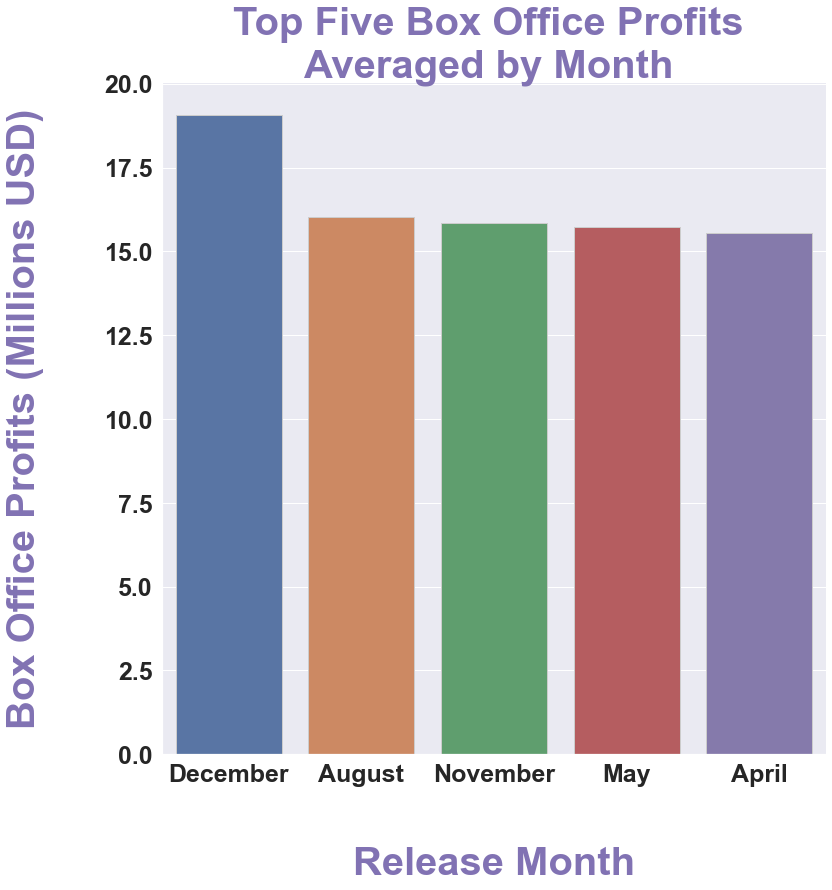

In [126]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# create a Categorical Plot 
# Passing data and assigning x and y 
# passing the hight of plot.
sns.catplot(x = top5_months.index, 
                y = top5_months['box_office']/1000000, 
                data= top5_months ,
                kind='bar',
                height =10,
                edgecolor=".8"); 



# Set title with matplotlib
plt.title('Top Five Box Office Profits \nAveraged by Month ',color='m',fontweight='bold',fontsize=40)
# Add x-axis label
plt.xlabel("Release Month",color='m',labelpad=60,fontweight='bold',fontsize=40)
# Add y-axis label
plt.ylabel("Box Office Profits (Millions USD)",color='m',labelpad=60,fontweight='bold',fontsize=40)
# customize labels
plt.xticks(fontweight='bold',fontsize=25)
plt.yticks(fontweight='bold',fontsize=25)



We notice that,The highest value of box office profits had achieved in DECEMBER during the holiday seasons


# Results

According to the data that we analized above, We found some factors directly affect movie's profits on Box Office:

#### First : Movies Genre

As we can show from the figure below , box office profits increase in some movie genres.

The top 5 box office profits were recorded (Animation,Romance,Comedy,Drama,Horror).However, the highest number of produced movies falls under Drama Genre. 

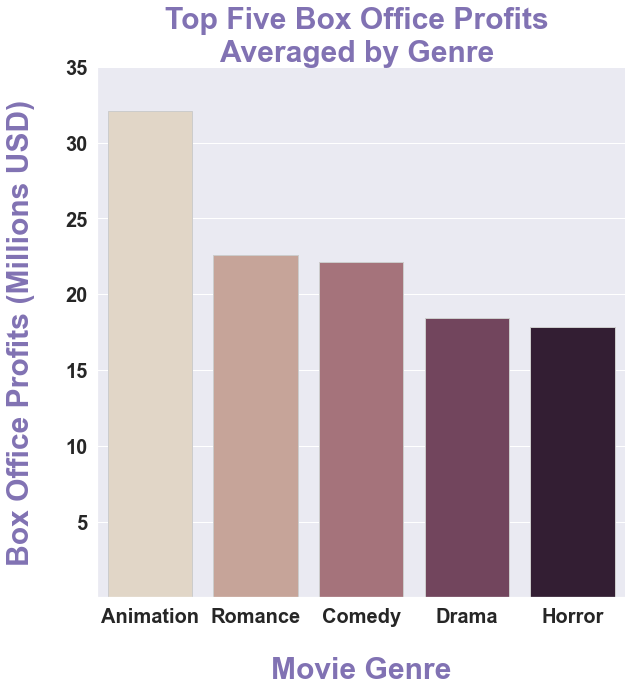

#### Second : Production budget

When we take a look at the figure below , we can notify the postive corelation between the movie's production budget average and the movie's total gross which represents both forgien gross and domestic gross.
When the production budget increases the Movie grossing increases as well.

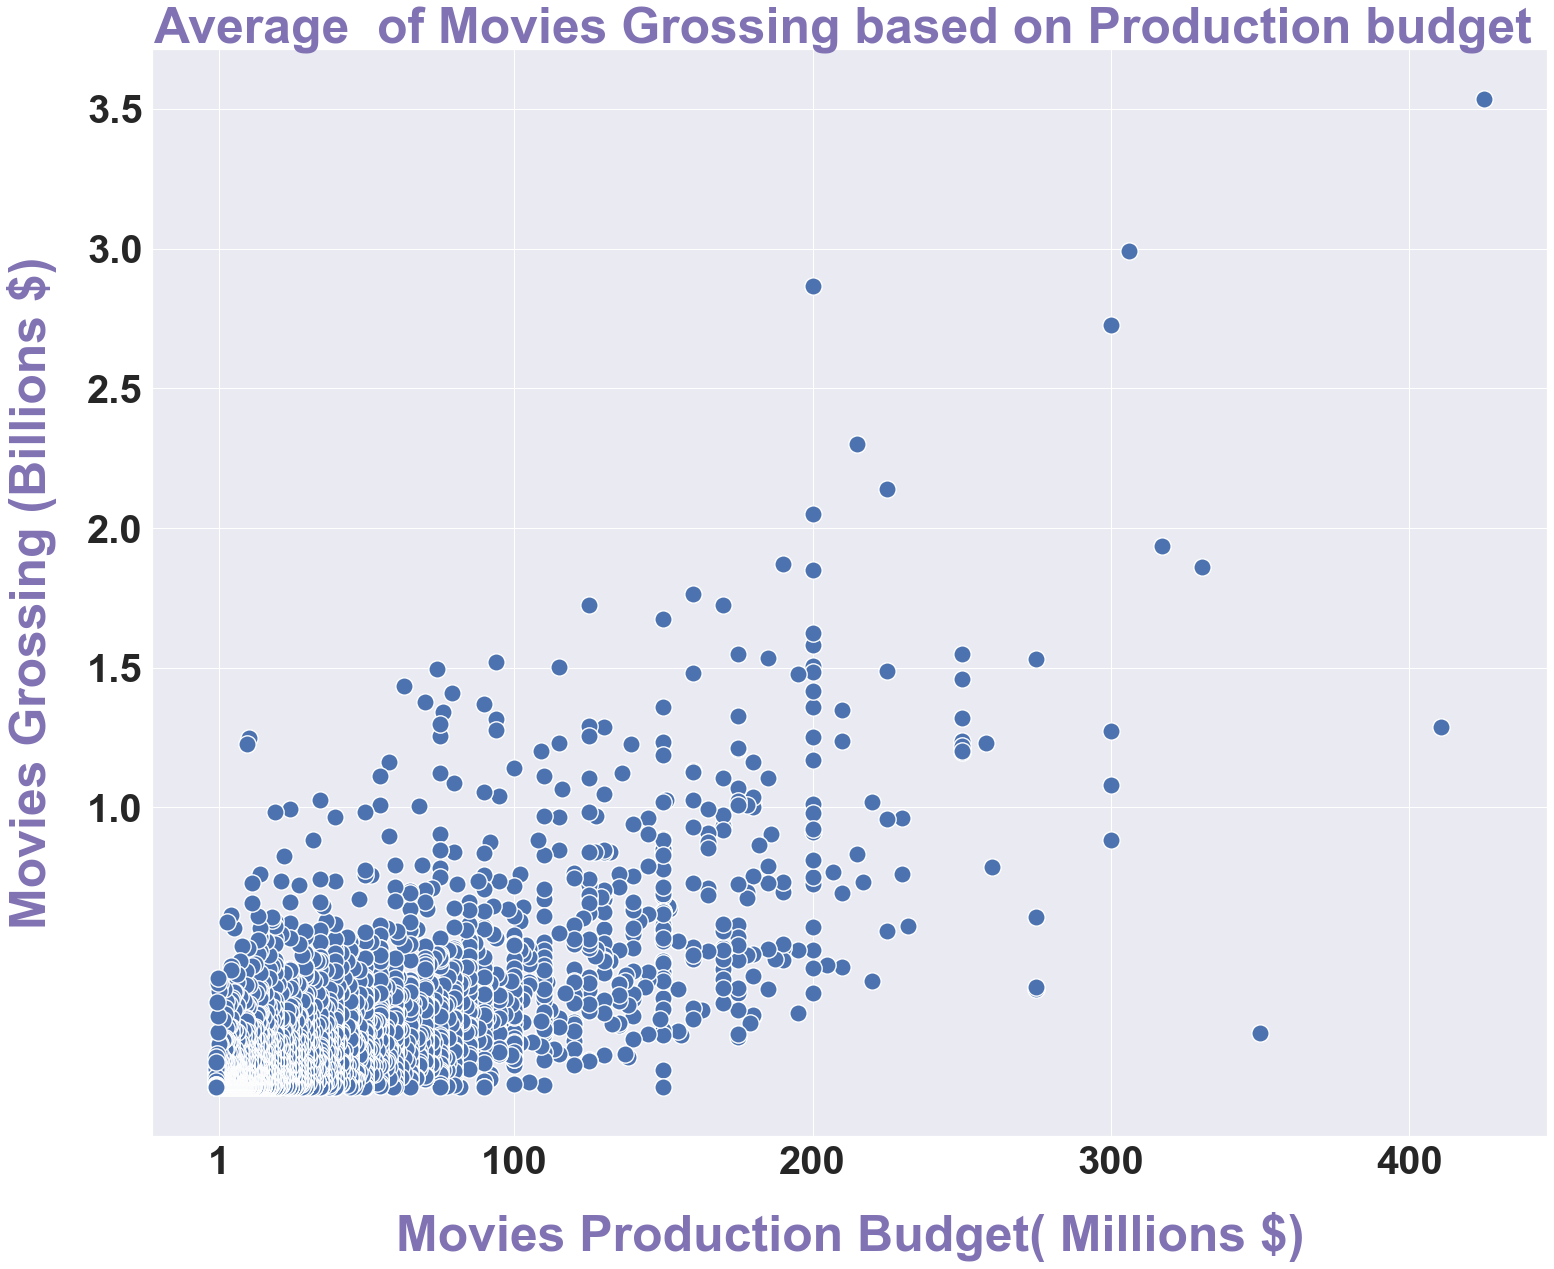

#### Third : Released date

When we take a look at the figure below , we can show the clear relationship between the box office profits based on the month that the movie was released in . The highest profits were reported in December. That means the movie can gain more if it releases during the Christmas season.

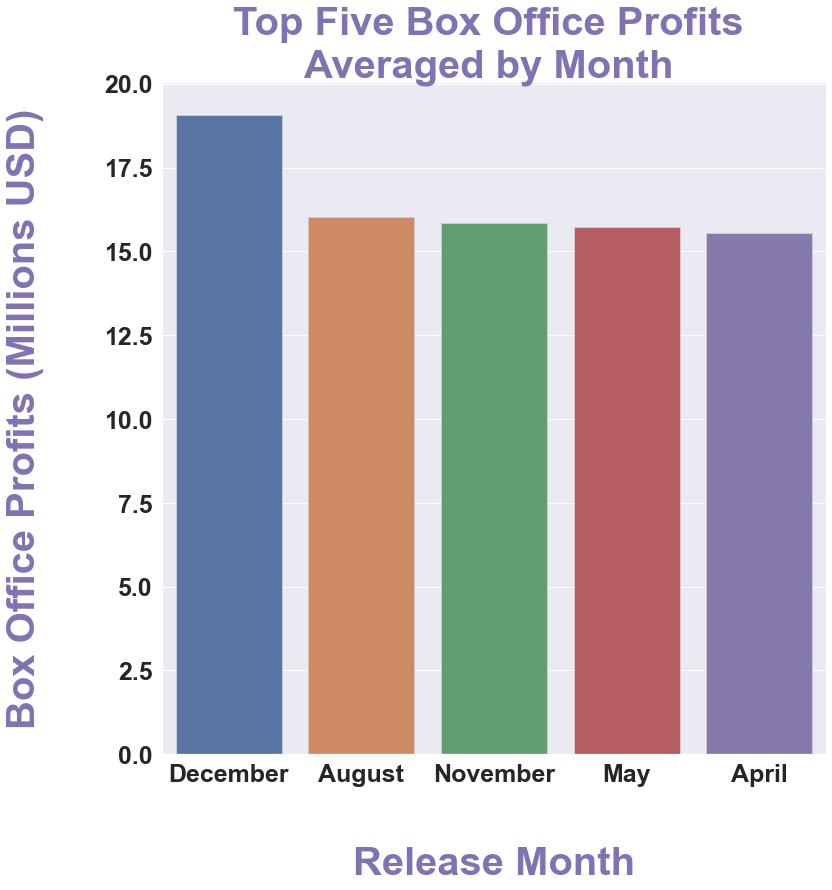

# Conclusion

This analysis leads to three recommendations for helping Microsoft to understand the factors that are affecting their profits.


1.More accurate forecasting of the movie genres most likely to bring in more money Which movie genre receives the highest box office profits

2.Predect the production budget,the average amount of money required to produce a film that generates greater revenue could be calculated using this approach.

3.More accurate estimation of the film's cinema release time. This model might make use of information that is currently accessible, such as monthly averages for box office revenues.

# Recommendations

Based on the results , our recommendations would be in three areas:


### 1.Movie's Genre:
Microsoft should pay more attention to the movie genre, which gains more profits at the box office? As we found the movies in the Animation genre achieved the highest box office revenues.

### 2.Production budget:


The average amount of money that needed to produce a movie hits box office better to be between (100-400) milions dollars movie with this production budget gains around (1.5-3.5) billions dollars.

### 3.Movies released month:

Microsoft should release their movie in December during the Christmas holiday season,when the box office gains highest profits  at that time.